In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)


This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

The variables are self-explanatory.

symboling :- rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling".

| **Column Name**          | **Description of Each Column**                   |
| -------------            | :---------------------------                     |
| symboling                | -3, -2, -1, 0, 1, 2, 3                           |
| normalized-losses        | continuous from 65 to 256                        |
| make                     |alfa-romero, audi, bmw, chevrolet, dodge, honda,  |
|                          | isuzu, jaguar, mazda, mercedes-benz, mercury,    ||                          | mitsubishi, nissan, peugot, plymouth, porsche,   |
|                          | renault, saab, subaru, toyota, volkswagen, volvo |
| fuel-type                | diesel, gas                                      |
| aspiration               | std, turbo                                       |
| num-of-doors             | four, two                                        |
| body-style               | hardtop, wagon, sedan, hatchback, convertible    |
| drive-wheels             | 4wd, fwd, rwd   |
| engine-location          | front, rear   |
| wheel-base               | continuous from 86.6 120.9   |
| length                   | continuous from 141.1 to 208.1   |
| width                    | continuous from 60.3 to 72.3  |

## **Load Dataset**

In [43]:
am_df = pd.read_csv("https://raw.githubusercontent.com/gauravbatra14/Term-1/master/Data/Projects/Automobile_data.csv")

am_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## **Data Cleaning Process**

In [44]:
am_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [45]:
am_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## **Converting Object Datatypes in Numeric (int/ float values)**

In [0]:
am_df['normalized-losses'] = pd.to_numeric(am_df['normalized-losses'], errors = 'coerce')

In [0]:
am_df['bore'] = pd.to_numeric(am_df['bore'], errors = 'coerce')
am_df['stroke'] = pd.to_numeric(am_df['stroke'], errors = 'coerce')
am_df['horsepower'] = pd.to_numeric(am_df['horsepower'], errors = 'coerce')
am_df['peak-rpm'] = pd.to_numeric(am_df['peak-rpm'], errors = 'coerce')
am_df['price'] = pd.to_numeric(am_df['price'], errors = 'coerce')

In [0]:
am_df.loc[am_df['num-of-doors'] == '?','num-of-doors']=am_df['num-of-doors'].value_counts().index[0]

In [49]:
am_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## **Remove Null Values**

In [0]:
am_df.loc[am_df['normalized-losses'].isnull() , 'normalized-losses'] = am_df['normalized-losses'].mean()

In [0]:
am_df.loc[am_df['bore'].isnull() , 'bore'] = am_df['bore'].mean()

In [0]:
am_df.loc[am_df['stroke'].isnull() , 'stroke'] = am_df['stroke'].mean()

In [0]:
am_df.loc[am_df['horsepower'].isnull() , 'horsepower'] = am_df['horsepower'].mean()

In [0]:
am_df.loc[am_df['peak-rpm'].isnull() , 'peak-rpm'] = am_df['peak-rpm'].mean()

In [0]:
am_df.loc[am_df['price'].isnull() , 'price'] = am_df['price'].mean()

In [56]:
am_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## **Checking Categorical columns**

In [57]:
am_df.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [58]:
am_df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [59]:
am_df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [60]:
am_df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [61]:
am_df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [62]:
am_df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

## **Data Visualization on Dataset**

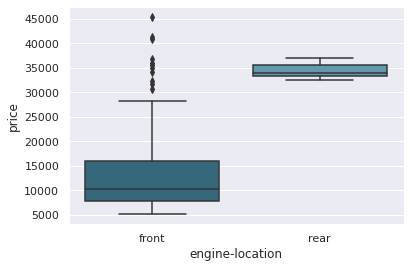

In [63]:
sns.boxplot(x='engine-location', y='price', data=am_df, palette="PuBuGn_d")

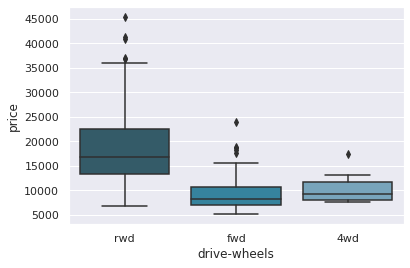

In [64]:
sns.boxplot(x='drive-wheels', y='price', data=am_df, palette="PuBuGn_d")

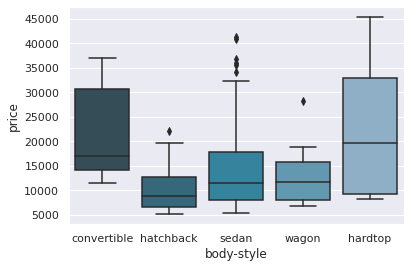

In [65]:
sns.boxplot(x='body-style', y='price', data=am_df, palette="PuBuGn_d")

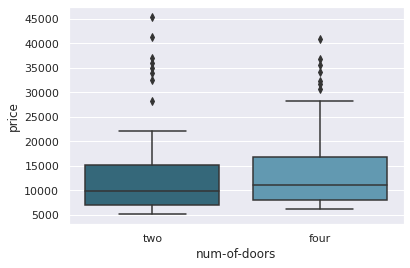

In [66]:
sns.boxplot(x='num-of-doors', y='price', data=am_df, palette="PuBuGn_d")

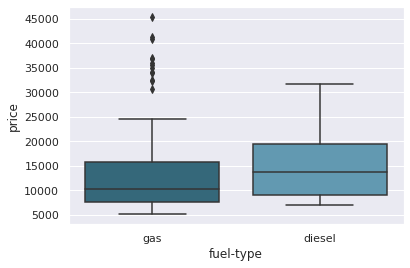

In [67]:
sns.boxplot(x='fuel-type', y='price', data=am_df, palette="PuBuGn_d")

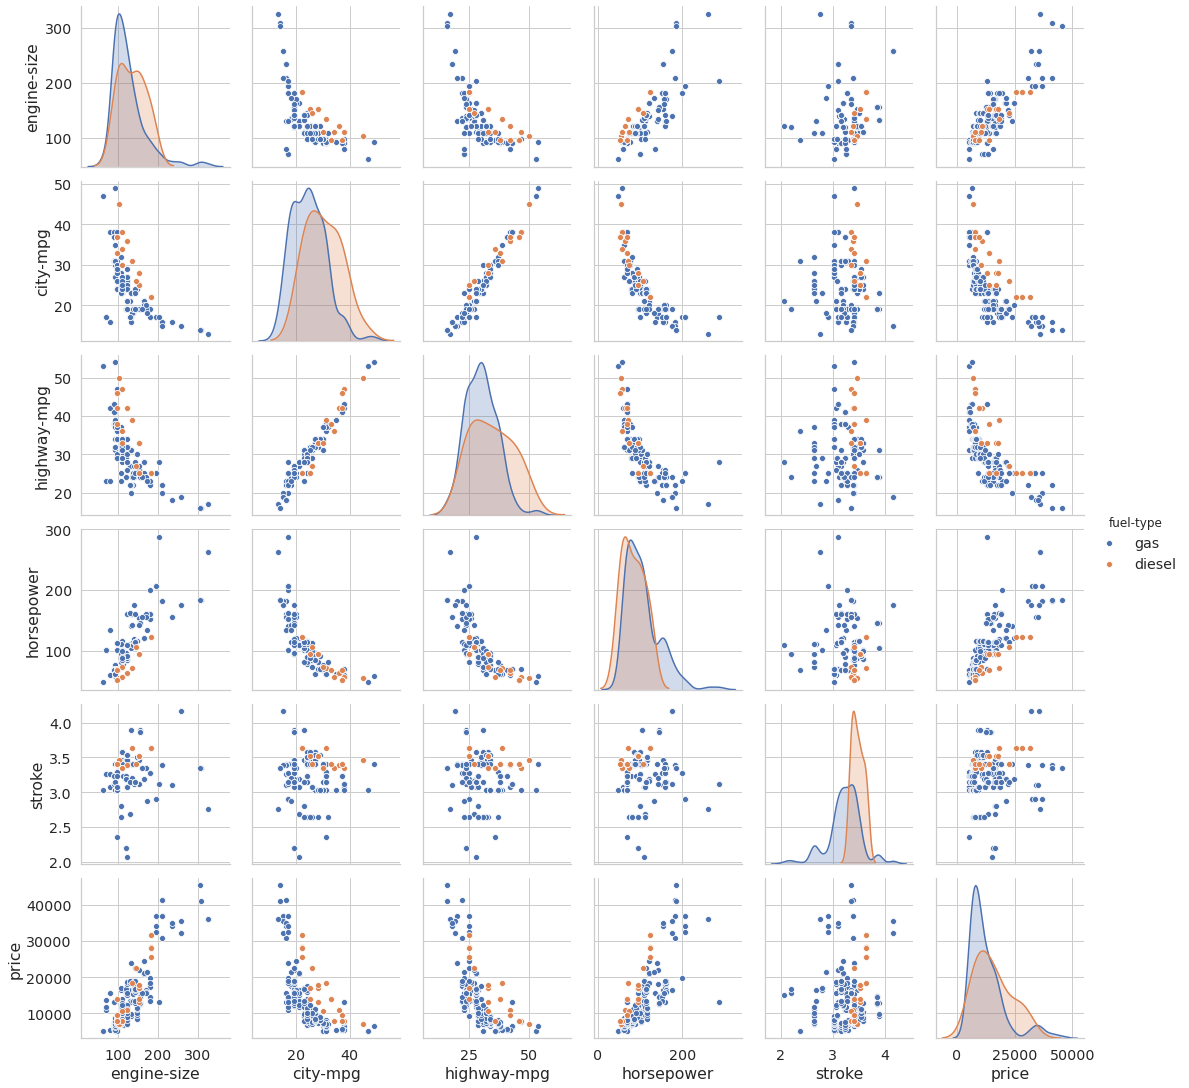

In [87]:
sns.pairplot(data=am_df, vars=['engine-size', 'city-mpg', 'highway-mpg', 'horsepower', 'stroke', 'price'], hue='fuel-type', diag_kind="kde")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

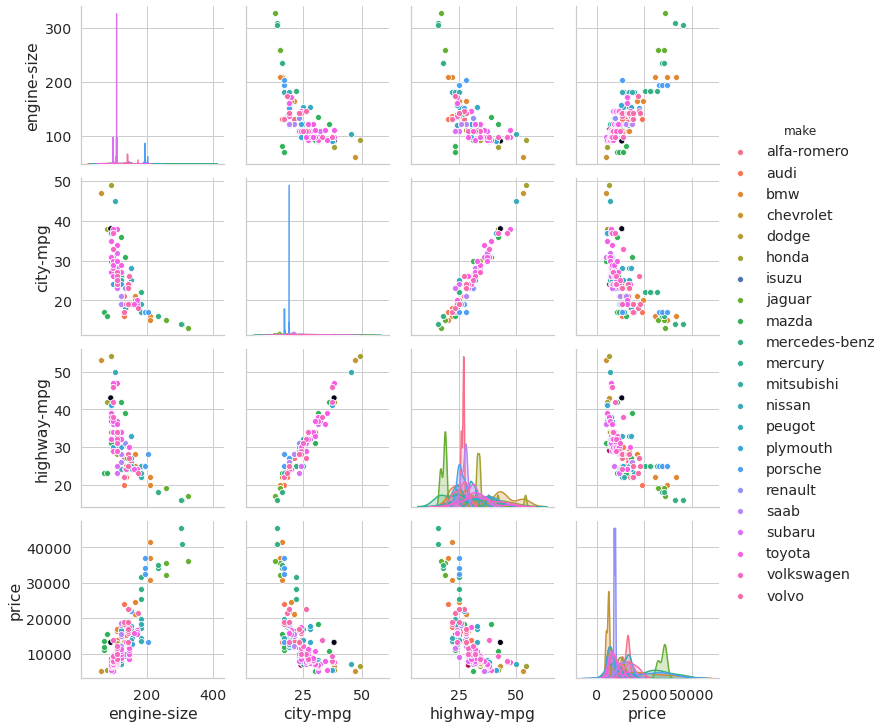

In [88]:
sns.pairplot(data=am_df, vars=['engine-size', 'city-mpg', 'highway-mpg', 'price'], hue='make', diag_kind="kde")  

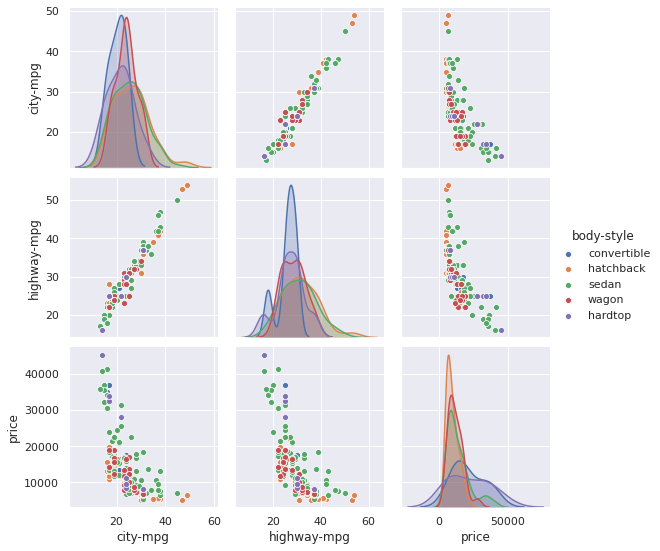

In [70]:
sns.pairplot(data=am_df, vars=['city-mpg', 'highway-mpg', 'price'], hue='body-style', diag_kind="kde")  

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

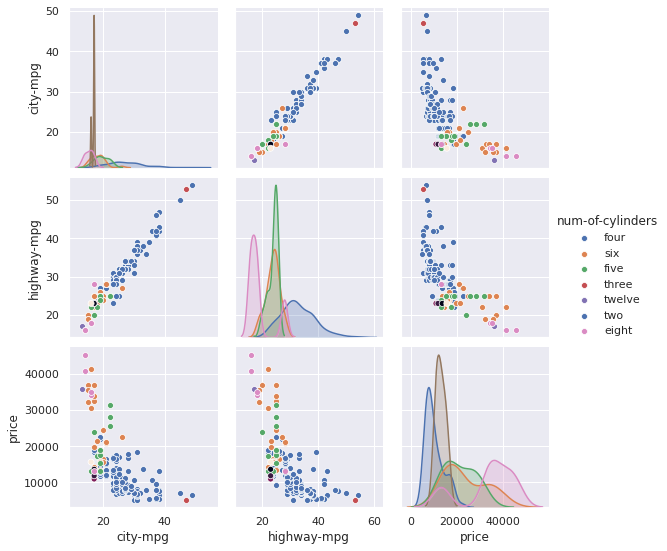

In [71]:
sns.pairplot(data=am_df, vars=['city-mpg', 'highway-mpg', 'price'], hue='num-of-cylinders', diag_kind="kde")  

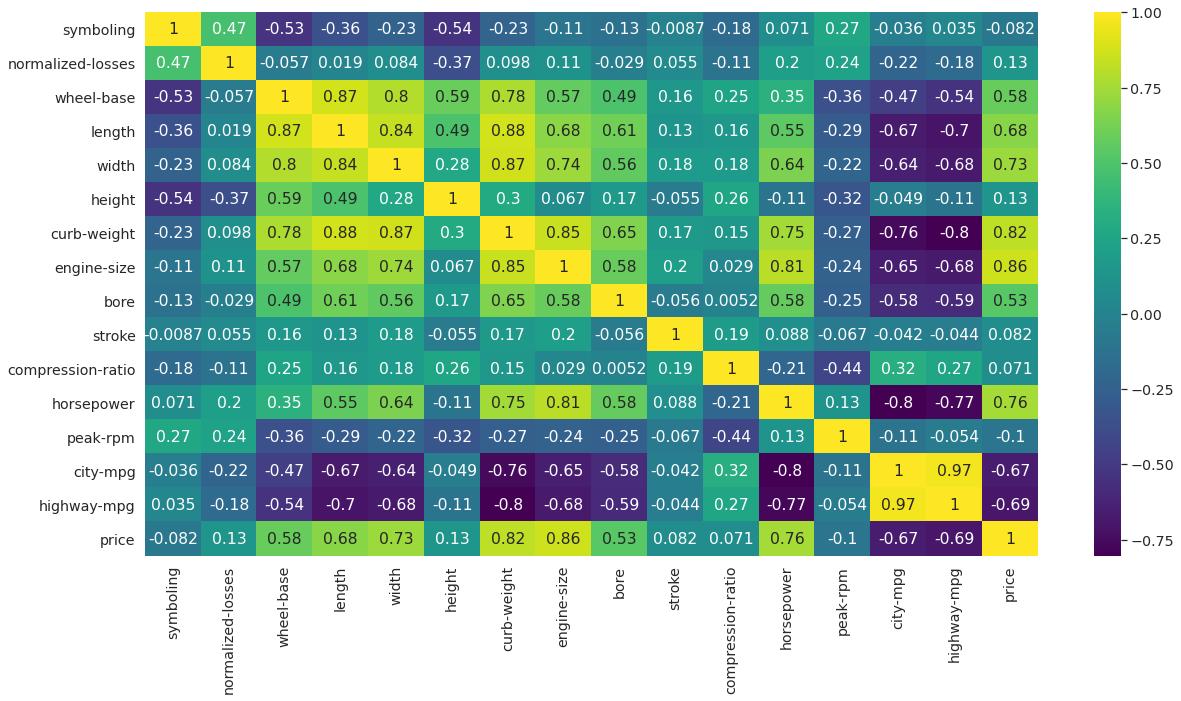

In [86]:
corr_mat = am_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, cmap='viridis', annot=True)

#### 1. After getting insights from Data, we have found that Price is having negative co-relation with City-mpg and highway-mpg.
#### 2. Price is having good co-relation with its body and its main features parts such as Engine Size, Horsepower, height, width, length, bore and wheel base.
#### 3. Horsepower is defined as per engine size and rest of things are also decided as per engine size and price is also being finalized basis on all these things.
#### 4. As Bigger brands(Audi, BMW, Mercedes-Benz, Mercury etc.) are known for higher speed & class which are having high prices because of heavy engines & high horsepower so they all are inversely proportional to mileage.